In [1]:
import ccxt
from crypto_data_fetcher.bybit import BybitFetcher
import pandas as pd

In [2]:
bybit = ccxt.bybit()
fetcher = BybitFetcher(ccxt_client=bybit)

df = fetcher.fetch_ohlcv(
    market='BTCUSDT', # 市場のシンボルを指定。この場合は https://ftx.com/trade/BTC-PERP を取得
    interval_sec=1 * 60, # 足の間隔を秒単位で指定。この場合は5分足
)

display(df)

,op,hi,lo,cl,volume
timestamp,,,,,
2020-03-25 06:37:25+00:00,6500.0,6500.0,6500.0,6500.0,0.000
2020-03-25 10:36:00+00:00,6500.0,6500.0,6500.0,6500.0,0.001
2020-03-25 10:37:00+00:00,6500.0,6500.0,6500.0,6500.0,0.000
2020-03-25 10:38:00+00:00,6500.0,6500.0,6500.0,6500.0,0.000
2020-03-25 10:39:00+00:00,6500.0,6500.0,6500.0,6500.0,0.000
...,...,...,...,...,...
2022-01-01 15:07:00+00:00,46972.5,46972.5,46972.0,46972.0,5.794
2022-01-01 15:08:00+00:00,46972.0,46972.5,46972.0,46972.5,17.241
2022-01-01 15:09:00+00:00,46972.5,46972.5,46950.0,46950.0,8.212


In [4]:
d2 = df[df.index >= '2021-12-01 00:00:00']

In [5]:
d2.to_csv('bybit_usdt_m.csv')

In [2]:
d2 = pd.read_csv('bybit_usdt_m.csv')

In [3]:
o_dif = 300 # 現在の価格からどれくらい離れた価格に指値を出すか
s_dif = 150 # 決済注文をどれくらい離れた価格で出すか

In [4]:
d2['ord']=0

In [5]:
d2['ord'] = d2['cl'].shift()

In [6]:
d2['ord'] = d2['ord'] - o_dif

In [7]:
d=d2['ord']>d2['lo']

In [8]:
d2['pos']=0
d2['stl']=0
d2['sts']=0
d2['pl']=0

In [9]:
p = 0
for index, row in d2.iterrows():
    if index == 0:
        continue
    if d2.at[index-1, 'pos'] != 0:
        d2.at[index, 'stl']=d2.at[index-1, 'pos'] + s_dif
        d2.at[index, 'sts']=d2.at[index-1, 'pos'] - s_dif
    
    if d2.at[index, 'sts'] != 0 and d2.at[index, 'sts'] > d2.at[index, 'lo']:
        d2.at[index, 'pos'] = 0
        d2.at[index, 'pl'] = -1*s_dif
    elif d2.at[index, 'stl'] != 0 and d2.at[index, 'stl'] < d2.at[index, 'hi']:
        d2.at[index, 'pos'] = 0
        d2.at[index, 'pl'] = s_dif
    else:
        d2.at[index, 'pos'] = d2.at[index-1, 'pos']
    
    if d2.at[index-1, 'pos'] == 0 and row['ord']>row['lo']:
        d2.at[index, 'pos']=row['ord']


In [27]:
d2.to_csv('bybit_usdt_result.csv')

In [10]:
d2['sum']=d2['pl'].cumsum()

In [11]:
import matplotlib.pyplot as plt


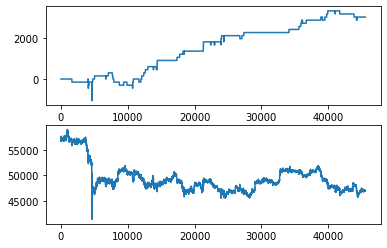

In [12]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(d2['sum'])
ax = fig.add_subplot(212)
ax.plot(d2['cl'])

In [4]:
o_dif_list = list(range(50,501,50))
s_dif_list = list(range(50,201,10))

In [5]:
def hige(d2, o_dif, s_dif):
    d2['ord']=0
    d2['pos']=0
    d2['stl']=0
    d2['sts']=0
    d2['pl']=0
    
    d2['ord'] = d2['cl'].shift()
    d2['ord'] = d2['ord'] - o_dif
    
    for index, row in d2.iterrows():
        if index == 0:
            continue
        if d2.at[index-1, 'pos'] != 0:
            d2.at[index, 'stl']=d2.at[index-1, 'pos'] + s_dif
            d2.at[index, 'sts']=d2.at[index-1, 'pos'] - s_dif
        
        if d2.at[index, 'sts'] != 0 and d2.at[index, 'sts'] > d2.at[index, 'lo']:
            d2.at[index, 'pos'] = 0
            d2.at[index, 'pl'] = -1*s_dif
        elif d2.at[index, 'stl'] != 0 and d2.at[index, 'stl'] < d2.at[index, 'hi']:
            d2.at[index, 'pos'] = 0
            d2.at[index, 'pl'] = s_dif
        else:
            d2.at[index, 'pos'] = d2.at[index-1, 'pos']
        
        if d2.at[index-1, 'pos'] == 0 and row['ord']>row['lo']:
            d2.at[index, 'pos']=row['ord']
        
        d2['sum']=d2['pl'].cumsum()
        
    return d2

In [6]:
d2 = pd.read_csv('bybit_usdt_m.csv')
d2 = hige(d2, o_dif, s_dif)

In [7]:
r=d2.iloc[-1]['sum']
bool1 = d2['pl'] != 0
trn=bool1.sum()
bool2 = d2['pl'] > 0
hit=bool2.sum()/trn

In [8]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(d2['sum'])
ax = fig.add_subplot(212)
ax.plot(d2['cl'])

NameError: name 'plt' is not defined

In [9]:
import itertools
p = list(itertools.product(o_dif_list, s_dif_list))

In [10]:
rs = pd.DataFrame(columns=['o_dif', 's_dif','r', 'trn', 'hit'])

In [11]:
for o_dif, s_dif in itertools.product(o_dif_list, s_dif_list):
    print(o_dif, s_dif)
    d2 = pd.read_csv('bybit_usdt_m.csv')
    d2 = hige(d2, o_dif, s_dif)
    r=d2.iloc[-1]['sum']
    bool1 = d2['pl'] != 0
    trn=bool1.sum()
    bool2 = d2['pl'] > 0
    hit=bool2.sum()/trn
    rs = rs.append({'o_dif': o_dif, 's_dif': s_dif, 'r': r, 'trn': trn, 'hit': hit}, ignore_index=True)

50 50
50 60
50 70
50 80
50 90
50 100
50 110
50 120
50 130
50 140
50 150
50 160
50 170
50 180
50 190
50 200
100 50
100 60
100 70
100 80
100 90
100 100
100 110
100 120
100 130
100 140
100 150
100 160
100 170
100 180
100 190
100 200
150 50
150 60
150 70
150 80
150 90
150 100
150 110
150 120
150 130
150 140
150 150
150 160
150 170
150 180
150 190
150 200
200 50
200 60
200 70
200 80
200 90
200 100
200 110
200 120
200 130
200 140
200 150
200 160
200 170
200 180
200 190
200 200
250 50
250 60
250 70
250 80
250 90
250 100
250 110
250 120
250 130
250 140
250 150
250 160
250 170
250 180
250 190
250 200
300 50
300 60
300 70
300 80
300 90
300 100
300 110
300 120
300 130
300 140
300 150
300 160
300 170
300 180
300 190
300 200
350 50
350 60
350 70
350 80
350 90
350 100
350 110
350 120
350 130
350 140
350 150
350 160
350 170
350 180
350 190
350 200
400 50
400 60
400 70
400 80
400 90
400 100
400 110
400 120
400 130
400 140
400 150
400 160
400 170
400 180
400 190
400 200
450 50
450 60
450 70
450 80
450 

In [12]:
rs.to_csv('rs.csv')